#**Stock Market Prediction using machine learing.**

For doing the stock market prediction, we are taking 20 years HDFC stocks results from 2000-01-03 to 2020-08-31. 

Stride:



1.   Loading Libraries
2.   Loading dataset
3.   Visualization of data
4.   Preprocessing of data
5.   Train and Test Split
6.   Building Model
7.   Optimization and Hyperparameter tuning
8.   Prediction

This file will contain bottom 4 strides and the top 4 strides are in Stock_market_prediction_Preprocessed file.








Firstly we will load the preprocessed HDFC stock file.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
from sklearn.metrics import mean_squared_error
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [110]:
data=pd.read_csv('HDFC-Preprocessed.csv')

In [111]:
data

,Date,Close,Scaled_closing_price
0,2000-01-03,293.50,0.003332
1,2000-01-04,304.05,0.006974
2,2000-01-05,292.80,0.003090
3,2000-01-06,296.45,0.004350
4,2000-01-07,286.55,0.000932
...,...,...,...
5136,2020-08-25,1829.60,0.533698
5137,2020-08-26,1816.00,0.529003
5138,2020-08-27,1864.10,0.545610
5139,2020-08-28,1883.25,0.552222


In [130]:
new_data = data.drop('Scaled_closing_price',axis=1)

In [131]:
#setting index as date
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [114]:
new_data

,Scaled_closing_price
Date,
2000-01-03,0.003332
2000-01-04,0.006974
2000-01-05,0.003090
2000-01-06,0.004350
2000-01-07,0.000932
...,...
2020-08-25,0.533698
2020-08-26,0.529003
2020-08-27,0.545610


In [132]:
values=new_data.values

In [133]:
values=np.array(values)
values.shape

(5141, 1)

For inverse transform 

In [136]:
#for normalizing data
values = scaler.fit_transform(values)

In [42]:
data['Date'] = pd.to_datetime(data['Date'])

In [43]:
data['month'] = data['Date'].dt.month

In [44]:
data

,Date,Close,Scaled_closing_price,month
0,2000-01-03,293.50,0.003332,1
1,2000-01-04,304.05,0.006974,1
2,2000-01-05,292.80,0.003090,1
3,2000-01-06,296.45,0.004350,1
4,2000-01-07,286.55,0.000932,1
...,...,...,...,...
5136,2020-08-25,1829.60,0.533698,8
5137,2020-08-26,1816.00,0.529003,8
5138,2020-08-27,1864.10,0.545610,8
5139,2020-08-28,1883.25,0.552222,8


In [45]:
data["week"] = data.Date.dt.week
data["day"] = data.Date.dt.day
data["day_of_week"] = data.Date.dt.dayofweek
data.head()

,Date,Close,Scaled_closing_price,month,week,day,day_of_week
0,2000-01-03,293.50,0.003332,1,1,3,0
1,2000-01-04,304.05,0.006974,1,1,4,1
2,2000-01-05,292.80,0.003090,1,1,5,2
3,2000-01-06,296.45,0.004350,1,1,6,3
4,2000-01-07,286.55,0.000932,1,1,7,4


In [46]:
data['mon_fri'] = 0
for i in range(0,len(data)):
    if (data['day_of_week'][i] == 0 or data['day_of_week'][i] == 4):
        data['mon_fri'][i] = 1
    else:
        data['mon_fri'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
data

,Date,Close,Scaled_closing_price,month,week,day,day_of_week,mon_fri
0,2000-01-03,293.50,0.003332,1,1,3,0,1
1,2000-01-04,304.05,0.006974,1,1,4,1,0
2,2000-01-05,292.80,0.003090,1,1,5,2,0
3,2000-01-06,296.45,0.004350,1,1,6,3,0
4,2000-01-07,286.55,0.000932,1,1,7,4,1
...,...,...,...,...,...,...,...,...
5136,2020-08-25,1829.60,0.533698,8,35,25,1,0
5137,2020-08-26,1816.00,0.529003,8,35,26,2,0
5138,2020-08-27,1864.10,0.545610,8,35,27,3,0
5139,2020-08-28,1883.25,0.552222,8,35,28,4,1


In [48]:
#setting index as date
data.index = data.Date
data.drop('Date', axis=1, inplace=True)

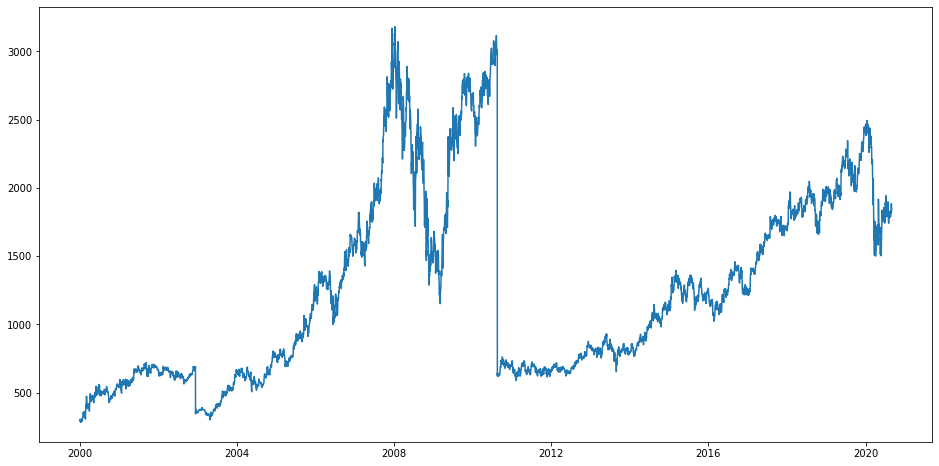

In [49]:
#plot
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

We are going to use scaled_closing_price from our dataframe.
and will classify them in train and test


##**5. Train and Test Split**

We are going to start splitting data in the span of 30 days closing price that is we will use past 30 days data to predict future prices and as mentioned in the problem statement we will be predicting 10 days future prices.

If we get good results from 30 days then we will proceed otherwise we will check it for 60 days.

In [50]:
train = data[:4112] #approx 80% of the data will be train set
test =  data[4112:] # 20% of data will be test set

In [51]:
x_train = train.drop(['Close','Scaled_closing_price'], axis=1)
y_train = train['Close']
x_test = test.drop(['Close','Scaled_closing_price'], axis=1)
y_test = test['Close']


In [52]:
x_train.shape

(4112, 5)

#**6. Building Model**

We are setting Linear Regression Model as our baseline model.

Linear Regression model

and we will see the rmse value for comparison

In [53]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#make predictions 
closing_price = regressor.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


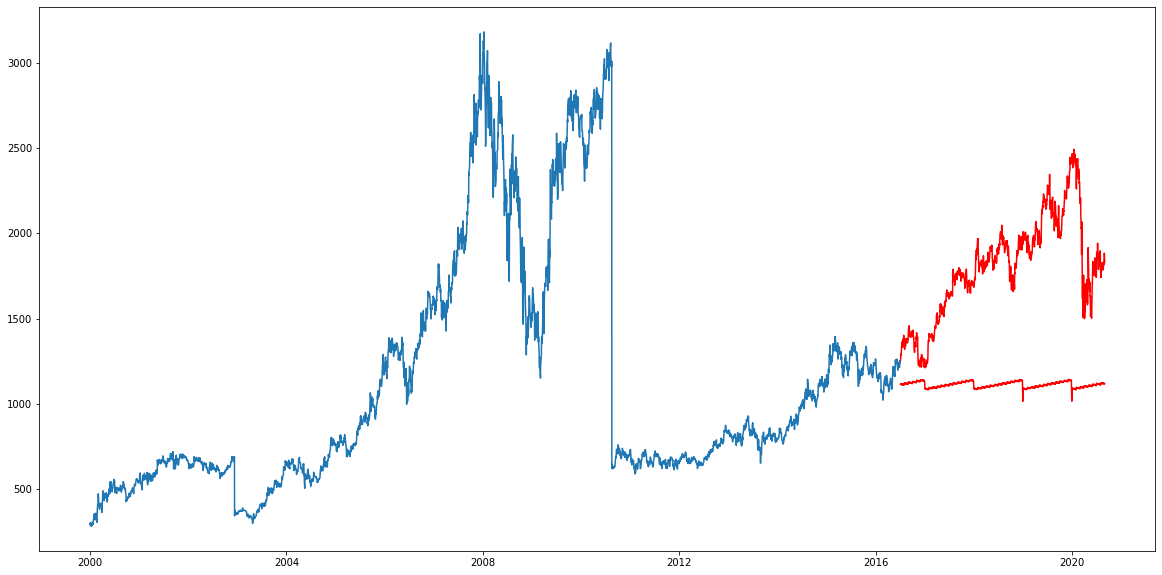

In [55]:
test['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']],'r');

Linear regression - Rmse value for train data

In [31]:
train_predict=regressor.predict(x_train)
math.sqrt(mean_squared_error(y_train,train_predict))

694.6629226422092

Linear regression- Rmse value for test data

In [56]:
test_predict=regressor.predict(x_test)
math.sqrt(mean_squared_error(y_test,test_predict))

750.0620841995385

**Moving Average**

In [64]:
# We are again loading the file as we made few changes for the linear regression.
df = pd.read_csv('HDFC-Preprocessed.csv')

print(df.head())
print('\n Shape of the data:')
print(df.shape)

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

train = new_data[:4112]
valid = new_data[4112:]

print('\n Shape of training set:')
print(train.shape)

print('\n Shape of validation set:')
print(valid.shape)
train_preds=[]
for i in range(0,train.shape[0]):
  a=train['Close'][i:200+i].sum()
  b=a/200
  train_preds.append(b)
test_preds = []
for i in range(0,valid.shape[0]):
  a=valid['Close'][i:200+i].sum()
  b=a/200
  test_preds.append(b)

         Date   Close  Scaled_closing_price
0  2000-01-03  293.50              0.003332
1  2000-01-04  304.05              0.006974
2  2000-01-05  292.80              0.003090
3  2000-01-06  296.45              0.004350
4  2000-01-07  286.55              0.000932

 Shape of the data:
(5141, 3)

 Shape of training set:
(4112, 2)

 Shape of validation set:
(1029, 2)


In [ ]:
valid.index=valid['Date']
valid

In [ ]:
train.index=train['Date']
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


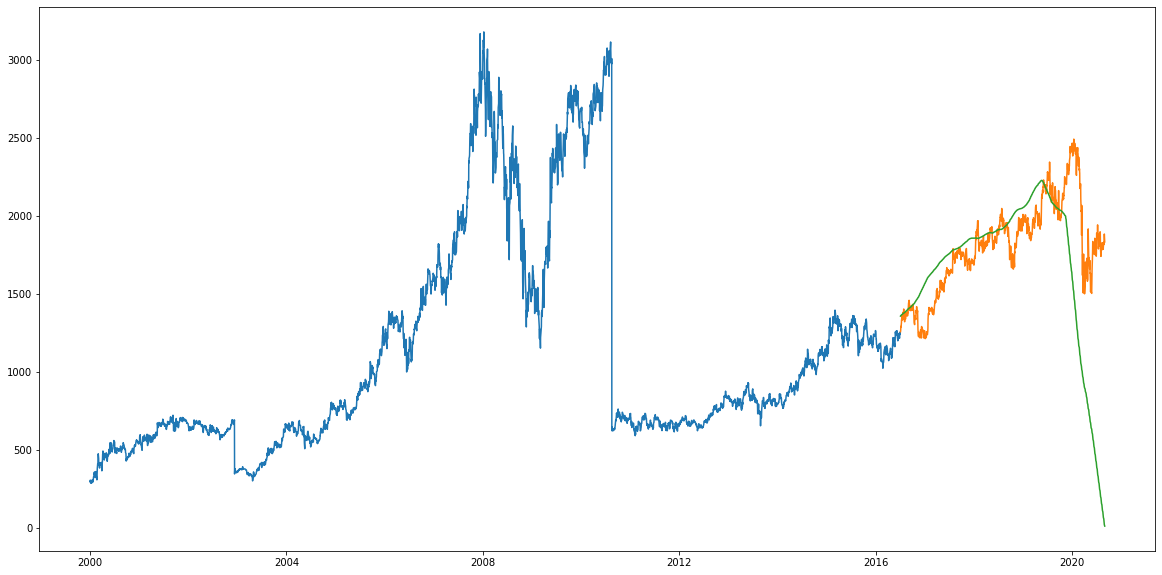

In [63]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

Moving Average- Rmse value for train data

In [65]:
math.sqrt(mean_squared_error(train['Close'],train_preds))

386.90499957127287

Moving Average- Rmse value for test data

In [66]:
math.sqrt(mean_squared_error(valid['Close'],test_preds))

516.0527117530019

As we can see the moving average has performed better from linear regression (rmse and graph comparison) but not much better as it highly depend upon previous value's average. so, it couldn't interpret the high peak that has been there.

#**NOTE-** 
We are now moving to deep learning models that is LSTM(LONG-SHORT-TERM-MEMORY)
So, before hovering around more algorithms we did some research and it shows that LSTM is for sequence data and has been performing quite good in time series data. that's why we are jumping to LSTM.

Deep Learning - LSTM 
Model Building

In [169]:
train = new_data[:3598] #approx 70% of the data will be train set
valid= new_data[3598:4112] # 10% for validation
test =  new_data[4112:] # 20% of data will be test set

In [170]:
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(values[i-30:i,0])
    y_train.append(values[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [171]:
inputs = values[3568:4112]
inputs = inputs.reshape(-1,1)

x_valid, y_valid = [], []
for i in range(30,inputs.shape[0]):
    x_valid.append(inputs[i-30:i,0])
    y_valid.append(inputs[i,0])
x_valid = np.array(x_valid)
y_valid=np.array(y_valid)

x_valid = np.reshape(x_valid, (x_valid.shape[0],x_valid.shape[1],1))

In [172]:
inputs = values[4082:]
inputs = inputs.reshape(-1,1)

X_test,y_test = [],[]
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
y_test=np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [103]:
import tensorflow as tf
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, LSTM  # import Dense from tensorflow.keras.layers
from numpy.random import seed  

We are beginning with simple LSTM model having 2 lstm layers and 1 output dense layer with optimizer as adam and loss=mean squared error and epochs as 2.


In [173]:
# create and fit the LSTM network
model = tf.keras.Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [174]:
history = model.fit(x_train, y_train,
                    batch_size=30, 
                    validation_data=(x_valid,y_valid), epochs=2,              
                    verbose=1)              

Epoch 1/2
119/119 [==============================] - 4s 37ms/step - loss: 0.0051 - val_loss: 3.3840e-04
Epoch 2/2
119/119 [==============================] - 4s 30ms/step - loss: 0.0016 - val_loss: 2.8506e-04


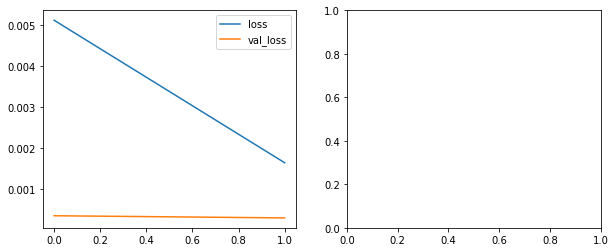

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history = pd.DataFrame(history.history)
history[['loss', 'val_loss']].plot(kind='line', ax=ax[0])

In [144]:
closing_price = model.predict(X_test)
closing_price
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


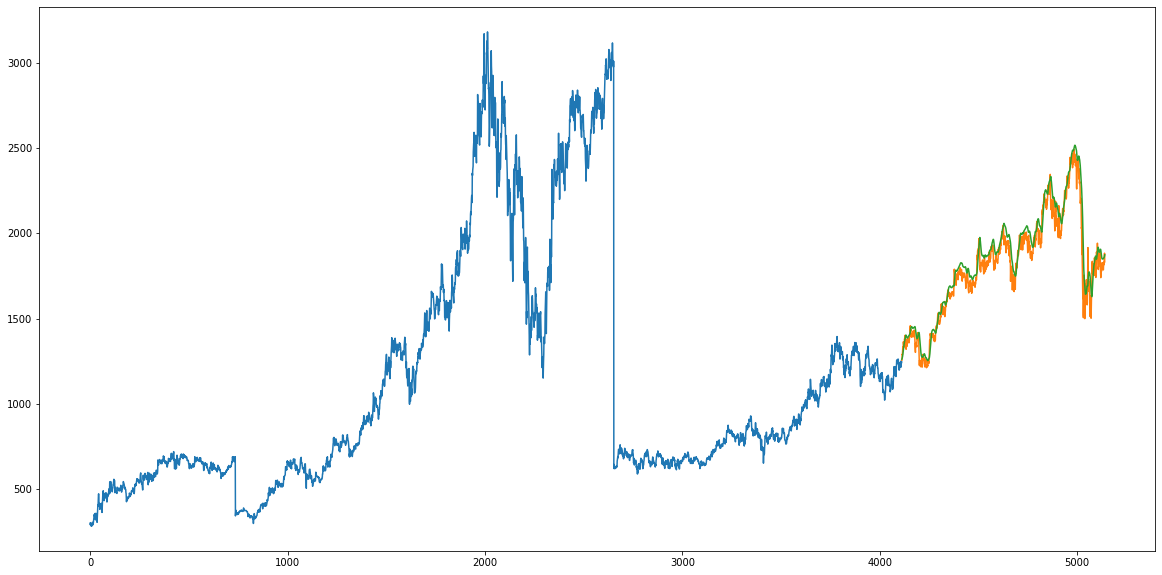

In [145]:
train = data[:4112]
valid = data[4112:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']]);

LSTM(2 epochs) Rmse value for train

In [146]:
train_predict=model.predict(x_train)
math.sqrt(mean_squared_error(y_train,train_predict))

0.03486737385701264

LSTM(2 epochs) Rmse value for test

In [148]:
test_predict=model.predict(X_test)
math.sqrt(mean_squared_error(y_test,test_predict))

0.0263384392766298

#**Optimization and Hyperparameter Tuning** 

Now we are taking past 60 days data to predict the next values

In [176]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(values[i-60:i,0])
    y_train.append(values[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [177]:
inputs = values[3568:4112]
inputs = inputs.reshape(-1,1)

x_valid, y_valid = [], []
for i in range(60,inputs.shape[0]):
    x_valid.append(inputs[i-60:i,0])
    y_valid.append(inputs[i,0])
x_valid = np.array(x_valid)
y_valid=np.array(y_valid)

x_valid = np.reshape(x_valid, (x_valid.shape[0],x_valid.shape[1],1))

In [185]:
inputs = values[4082:]
inputs = inputs.reshape(-1,1)

X_test ,y_test=[],[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
y_test=np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [179]:

# create and fit the LSTM network
model = tf.keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [161]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [180]:
history = model.fit(x_train, y_train,
                    batch_size=30, 
                    validation_data=(x_valid,y_valid), epochs=10,              
                    verbose=1)              

Epoch 1/10
118/118 [==============================] - 11s 96ms/step - loss: 0.0091 - val_loss: 3.1911e-04
Epoch 2/10
118/118 [==============================] - 11s 91ms/step - loss: 0.0021 - val_loss: 2.7197e-04
Epoch 3/10
118/118 [==============================] - 10s 89ms/step - loss: 0.0018 - val_loss: 3.1885e-04
Epoch 4/10
118/118 [==============================] - 10s 88ms/step - loss: 0.0015 - val_loss: 3.7281e-04
Epoch 5/10
118/118 [==============================] - 11s 90ms/step - loss: 0.0012 - val_loss: 2.5202e-04
Epoch 6/10
118/118 [==============================] - 11s 93ms/step - loss: 0.0012 - val_loss: 2.5678e-04
Epoch 7/10
118/118 [==============================] - 11s 93ms/step - loss: 9.8141e-04 - val_loss: 1.8503e-04
Epoch 8/10
118/118 [==============================] - 11s 93ms/step - loss: 8.6601e-04 - val_loss: 1.4591e-04
Epoch 9/10
118/118 [==============================] - 11s 94ms/step - loss: 8.4404e-04 - val_loss: 3.3584e-04
Epoch 10/10
118/118 [=============

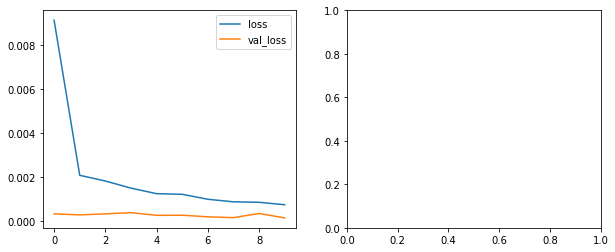

In [181]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0]);

In [ ]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

In [ ]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

array([[1250.3151],
       [1255.2281],
       [1260.3564],
       ...,
       [1862.3575],
       [1874.9617],
       [1894.6813]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


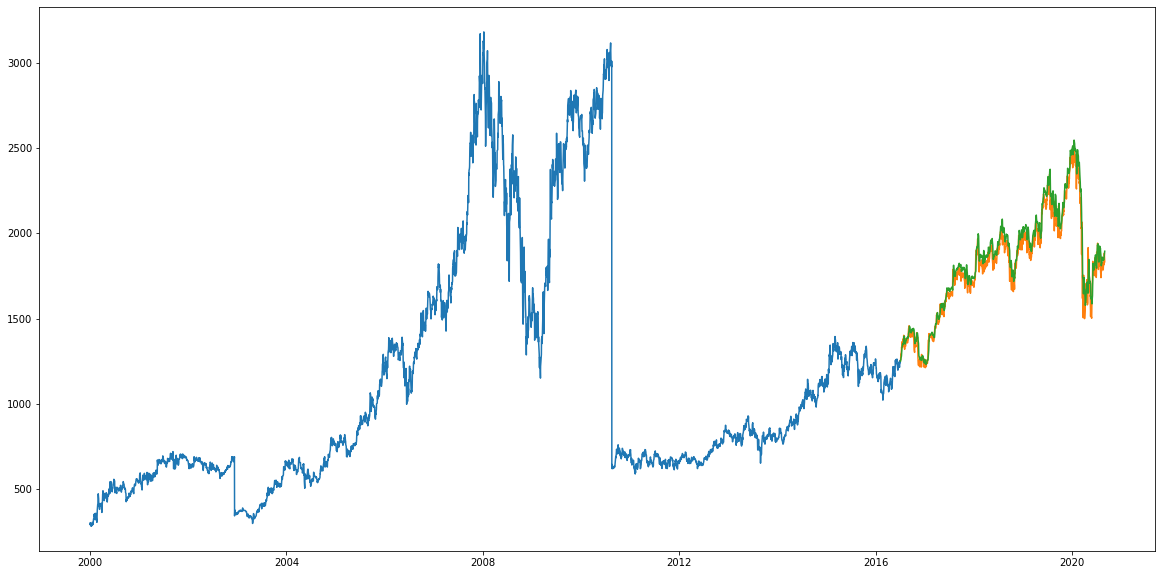

In [ ]:

train = data[:4112]
valid = data[4112:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']]);

In [182]:
train_predict=model.predict(x_train)
math.sqrt(mean_squared_error(y_train,train_predict))

0.023582652157173683

In [186]:
test_predict=model.predict(X_test)
math.sqrt(mean_squared_error(y_test,test_predict))

0.015378871484045412

**Optimizers**
We are going to see how different optimizers are performing.
epochs will be 10

**Adagrad**

In [187]:
# create and fit the LSTM network
model = tf.keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adagrad')

In [188]:
history = model.fit(x_train, y_train,
                    batch_size=30, 
                    validation_data=(x_valid,y_valid), epochs=10,              
                    verbose=1)              

Epoch 1/10
118/118 [==============================] - 12s 102ms/step - loss: 0.0714 - val_loss: 0.0035
Epoch 2/10
118/118 [==============================] - 11s 90ms/step - loss: 0.0390 - val_loss: 6.6695e-04
Epoch 3/10
118/118 [==============================] - 10s 83ms/step - loss: 0.0289 - val_loss: 5.2731e-04
Epoch 4/10
118/118 [==============================] - 10s 83ms/step - loss: 0.0201 - val_loss: 4.5595e-04
Epoch 5/10
118/118 [==============================] - 10s 88ms/step - loss: 0.0127 - val_loss: 4.8007e-04
Epoch 6/10
118/118 [==============================] - 10s 86ms/step - loss: 0.0076 - val_loss: 4.9404e-04
Epoch 7/10
118/118 [==============================] - 10s 85ms/step - loss: 0.0050 - val_loss: 5.6637e-04
Epoch 8/10
118/118 [==============================] - 10s 87ms/step - loss: 0.0040 - val_loss: 6.1572e-04
Epoch 9/10
118/118 [==============================] - 10s 86ms/step - loss: 0.0036 - val_loss: 6.6802e-04
Epoch 10/10
118/118 [============================

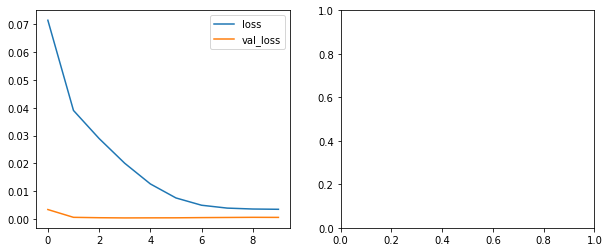

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0]);

In [191]:
train_predict=model.predict(x_train)
math.sqrt(mean_squared_error(y_train,train_predict))

0.05936650407091743

In [192]:
test_predict=model.predict(X_test)
math.sqrt(mean_squared_error(y_test,test_predict))

0.03812782888141117

As we can see by rmse values that adagrad optimizer couldn't perform better than adam.


**RMSprop**

In [193]:
model = tf.keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

In [194]:
history = model.fit(x_train, y_train,
                    batch_size=30, 
                    validation_data=(x_valid,y_valid), epochs=10,              
                    verbose=1)              

Epoch 1/10
118/118 [==============================] - 12s 101ms/step - loss: 0.0390 - val_loss: 0.0042
Epoch 2/10
118/118 [==============================] - 11s 94ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 3/10
118/118 [==============================] - 11s 90ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 4/10
118/118 [==============================] - 11s 93ms/step - loss: 0.0025 - val_loss: 3.5356e-04
Epoch 5/10
118/118 [==============================] - 11s 90ms/step - loss: 0.0020 - val_loss: 8.1823e-04
Epoch 6/10
118/118 [==============================] - 11s 89ms/step - loss: 0.0017 - val_loss: 8.1294e-04
Epoch 7/10
118/118 [==============================] - 11s 95ms/step - loss: 0.0016 - val_loss: 3.8209e-04
Epoch 8/10
118/118 [==============================] - 11s 91ms/step - loss: 0.0015 - val_loss: 7.0259e-05
Epoch 9/10
118/118 [==============================] - 10s 88ms/step - loss: 0.0013 - val_loss: 6.5528e-04
Epoch 10/10
118/118 [==============================] - 10

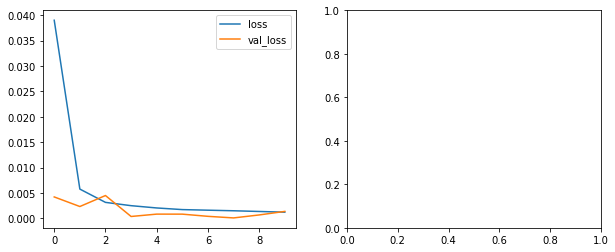

In [195]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0]);

In [196]:
train_predict=model.predict(x_train)
math.sqrt(mean_squared_error(y_train,train_predict))

0.04332654741182154

In [197]:
test_predict=model.predict(X_test)
math.sqrt(mean_squared_error(y_test,test_predict))

0.05505560287881014

RMSprop optimizer have performed better in train than adagrad as in terms of rmse but couldn't be better from adam.

Hence we are taking adam as optimizer and epochs=10 as final value after tuning our hyperparameters and are taking past 60 days data to predict the next value.

#**Prediction**

We are predicting closing price for next 10 days based upon past 60 days of closing price data.

1 day output [[1709.119]]
2 day output [[1725.7922]]
3 day output [[1746.3138]]
4 day output [[1766.9338]]
5 day output [[1786.2156]]
6 day output [[1803.7695]]
7 day output [[1819.6552]]
8 day output [[1834.151]]
9 day output [[1847.6532]]
10 day output [[1860.6]]


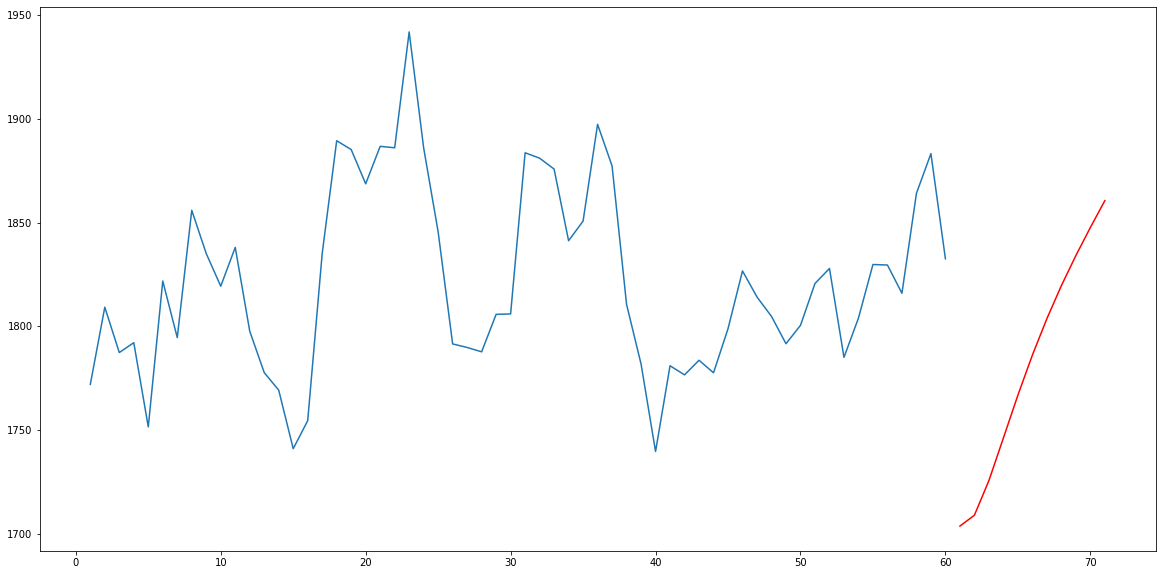

In [ ]:
x_input=X_test[340].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<11):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,scaler.inverse_transform(yhat)))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


day_new=np.arange(1,61)
day_pred=np.arange(61,72)
plt.plot(day_new,scaler.inverse_transform(new_data[5081:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output),'r')




# **Conclusion**

We have performed several algorithms in the notebook and compared their performance based upon their RMSE values in the train and test data set.
We finalised the LSTM model with adam as optimizer and which will take past 60 days closing price to predict next day's closing price and with the help of that we could predict next 10 days closing price.


## **Future perspective** 

We can use sentiment analysis as well with technical ananlysis and can combine the LSTM model with reinforcement learning and with huge computation power.